In [1]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [4]:
# the data is only 2D
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [6]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
______________________________________________

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 13s 211us/sample - loss: 0.5184 - acc: 0.8073 - val_loss: 0.3967 - val_acc: 0.8501
Epoch 2/15
60000/60000 [==============================] - 12s 206us/sample - loss: 0.3564 - acc: 0.8656 - val_loss: 0.3548 - val_acc: 0.8732
Epoch 3/15
60000/60000 [==============================] - 13s 210us/sample - loss: 0.3088 - acc: 0.8824 - val_loss: 0.3191 - val_acc: 0.8816
Epoch 4/15
60000/60000 [==============================] - 13s 211us/sample - loss: 0.2753 - acc: 0.8957 - val_loss: 0.3177 - val_acc: 0.8825
Epoch 5/15
60000/60000 [==============================] - 13s 221us/sample - loss: 0.2486 - acc: 0.9060 - val_loss: 0.2970 - val_acc: 0.8929
Epoch 6/15
60000/60000 [==============================] - 13s 224us/sample - loss: 0.2285 - acc: 0.9126 - val_loss: 0.3058 - val_acc: 0.8943
Epoch 7/15
60000/60000 [==============================] - 13s 220us/sample - loss: 0.2089 - acc: 0.9194 

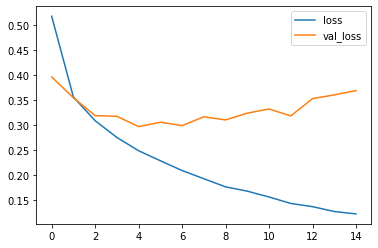

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

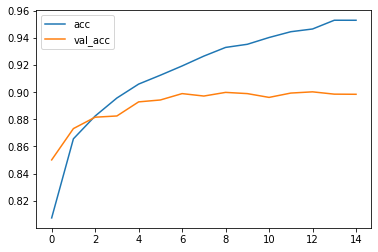

In [11]:
# Plot accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()

Consusion matrix, without normalization
[[853   3  23  25   1   1  90   0   3   1]
 [  3 970   2  18   4   0   2   0   1   0]
 [ 17   1 838  14  61   0  68   0   1   0]
 [ 11   4  16 912  31   0  26   0   0   0]
 [  1   0  56  26 817   0  98   0   2   0]
 [  1   0   0   1   0 963   0  22   1  12]
 [108   1  58  29  63   1 731   0   9   0]
 [  0   0   0   0   0   3   0 969   0  28]
 [  0   0   3   4   2   1  12   2 975   1]
 [  0   0   0   0   0   6   1  36   0 957]]


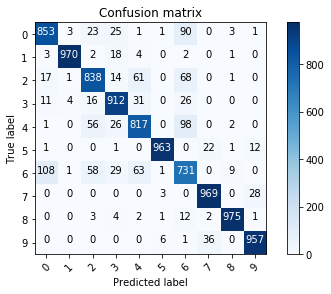

In [12]:
from sklearn.metrics import confusion_matrix
import itertools
def plt_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  '''
  This function prints and plots the confusion matrix.
  Normalization can be appled by setting `normalize=True`.
  '''
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('normalized confusion matrix')
  else:
    print('Consusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plt_confusion_matrix(cm, list(range(10)))


In [13]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

Text(0.5, 1.0, 'True label: Ankle, Predicted: Sneaker')

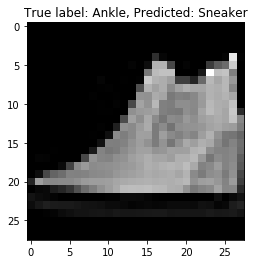

In [14]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s, Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))